Adjust Tiff Images to NPY for prediction

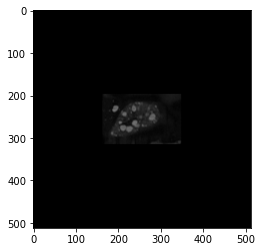

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

im = Image.open(r"C:\Users\emmasch\Downloads\original_left.tif")
#im.show()
plt.imshow(im, cmap = 'gray')



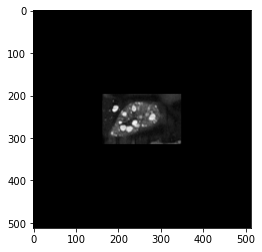

In [2]:
imarray = np.array(im)
plt.imshow(imarray, cmap = 'gray')

In [3]:
def gather_set_and_path(data_path, phrase):
    set_of = []
    path = data_path + '\\'
    for f in os.listdir(data_path):
      if phrase in f:
        set_of.append(str(data_path+f))
      else:
        continue
    #set_of = np.array(set_of)

    indices = np.array(range(len(set_of))) # we will use this in the next step.

    return set_of

In [4]:
def gather_filenames(path):
    raw_path = path
    patient_folders = []
    pt_fnames = []

    import os
    for root, dirs, files in os.walk(os.path.normpath(raw_path), topdown=True):
        for name in files: 
            #print(os.path.join(root, name))
            pt_fnames.append(os.path.join(root, name))
    print('\nPatient Folders have been identified\n')
    #sort through and get only the files with ROI in them
    #this eliminates the tiff and 3D files 
    #%%
    ROI_list = []
    for j in range(len(pt_fnames)):
        ROI_name = '.tif'
        filename = os.path.basename(pt_fnames[j])
        if ROI_name in filename:
            ROI_list.append(pt_fnames[j])
    print('\nFilenames have been found and added\n')
    print('copied and moved '+ str(len(ROI_list))+' files')
    
    return ROI_list

In [7]:
data_path = r'C:\Users\emmasch\Documents\TIFF\\'
npy_path = r'C:\Users\emmasch\Documents\TIFF\NPY'


In [8]:
tiff_list = gather_filenames(data_path)


Patient Folders have been identified


Filenames have been found and added

copied and moved 12 files


In [9]:
print(tiff_list[1])
name = tiff_list[1]
path_list = name.split(os.sep)
print(path_list[-2])
test_list = tiff_list[1].split(os.sep)
print(test_list)

C:\Users\emmasch\Documents\TIFF\113994_3\original_right.tif
113994_3
['C:', 'Users', 'emmasch', 'Documents', 'TIFF', '113994_3', 'original_right.tif']


In [85]:
print(tiff_list)

['C:\\Users\\emmasch\\Documents\\TIFF\\original_left.tif', 'C:\\Users\\emmasch\\Documents\\TIFF\\113994_3\\original_left.tif', 'C:\\Users\\emmasch\\Documents\\TIFF\\113994_3\\original_right.tif']


In [10]:
for i in range(len(tiff_list)):
    image = Image.open(tiff_list[i])
    path_list = tiff_list[i].split(os.sep)
    imarray = np.array(image)
    fname = path_list[-2] + '_' + path_list[-1]
    np.save(os.path.join(npy_path, fname), imarray)
    

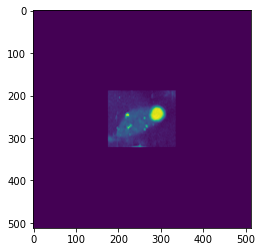

In [11]:
img = np.load(r"C:\Users\emmasch\Documents\TIFF\NPY\140353_3_original_left.tif.npy")
plt.imshow(img)